In [1]:
# -*- coding: utf-8 -*-

Commented out IPython magic to ensure Python compatibility.<br>
Ignore warnings<br>
The above code is importing necessary libraries and modules for data analysis and visualization in Python. It is also setting up some configurations to ignore warnings.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline

Initialize Plotly for use in the notebook<br>
The above code is importing the `init_notebook_mode` function from the `plotly.offline` module and then calling the function with the argument `connected=True`. This function is used to initialize Plotly in offline mode, which allows you to create and display interactive plots in Jupyter notebooks or other environments that support HTML rendering.

In [4]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

Configure Seaborn plot styles: Set background color and use dark grid<br>
The above code is setting the facecolor of the axes in a seaborn plot to '#fcf0dc' and applying a darkgrid style to the plot.

In [5]:
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

The above code is reading a CSV file named 'data.csv' using the pandas library in Python. It is specifying the encoding as "ISO-8859-1".

In [6]:
df = pd.read_csv('data.csv', encoding="ISO-8859-1")

The above code is written in Python and is performing two operations on a DataFrame object called "df".

In [7]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,AXIS BANK,6,12-01-2010 08:26,2.55,17850,United Kingdom
1,536365,71053,AAPL,6,12-01-2010 08:26,3.39,17850,United Kingdom
2,536365,84406B,AXIS BANK,8,12-01-2010 08:26,2.75,17850,United Kingdom
3,536365,84029G,ITC,6,12-01-2010 08:26,3.39,17850,United Kingdom
4,536365,84029E,NIIT,6,12-01-2010 08:26,3.39,17850,United Kingdom
5,536365,22752,MRF,2,12-01-2010 08:26,7.65,17850,United Kingdom
6,536365,21730,AXIS BANK,6,12-01-2010 08:26,4.25,17850,United Kingdom
7,536366,22633,AXIS BANK,6,12-01-2010 08:28,1.85,17850,United Kingdom
8,536366,22632,AAPL,6,12-01-2010 08:28,1.85,17850,United Kingdom
9,536367,84879,TORNTPOWER,32,12-01-2010 08:34,1.69,13047,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    501 non-null    object 
 1   StockCode    501 non-null    object 
 2   Description  501 non-null    object 
 3   Quantity     501 non-null    int64  
 4   InvoiceDate  501 non-null    object 
 5   UnitPrice    501 non-null    float64
 6   CustomerID   501 non-null    int64  
 7   Country      501 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 31.4+ KB


Summary statistics for numerical variables<br>
The above code is calculating descriptive statistics for each column in a DataFrame and transposing the result.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,501.0,18.015968,38.268417,-24.0,4.00,8.0,20.00,432.0
UnitPrice,501.0,3.798263,8.345204,0.1,1.25,2.1,4.15,165.0
CustomerID,501.0,15015.391218,2111.677918,12429.0,12738.00,14932.0,17511.00,18074.0


Summary statistics for categorical variables<br>
The above code is generating descriptive statistics for the columns in a DataFrame that contain object data types. The `.describe()` method is used to calculate various statistics such as count, unique values, top value, and frequency of the top value for each column. The `include='object'` parameter specifies that only columns with object data types should be included in the summary statistics. The `.T` at the end of the code is used to transpose the resulting DataFrame so that the columns become rows and vice versa.

In [10]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,501,48,581578,38
StockCode,501,342,22726,7
Description,501,10,AAPL,265
InvoiceDate,501,42,12-09-2011 12:16,38
Country,501,6,United Kingdom,353


Calculating the percentage of missing values for each column<br>
The above code is calculating the number and percentage of missing values in each column of a DataFrame called "df".

In [11]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

Prepare values<br>
The above code is sorting the values in the "missing_percentage" variable in ascending order and modifying the variable in place.

In [12]:
missing_percentage.sort_values(ascending=True, inplace=True)

Plot the barh chart<br>
The above code is creating a horizontal bar chart using matplotlib in Python. It sets the figure size to 15 inches wide and 4 inches tall. The `missing_percentage` variable is used as the data for the chart, and each value in `missing_percentage` is represented as a horizontal bar. The bars are colored with a shade of orange (#ff6200).

<BarContainer object of 0 artists>

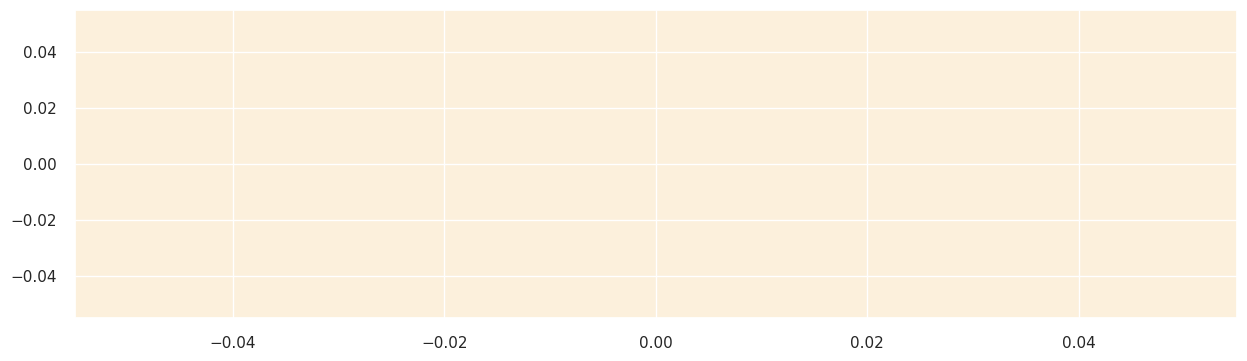

In [13]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

Annotate the values and indexes

In [14]:
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

Set x-axis limit

In [15]:
ax.set_xlim([0, 40])

(0.0, 40.0)

Add title and xlabel

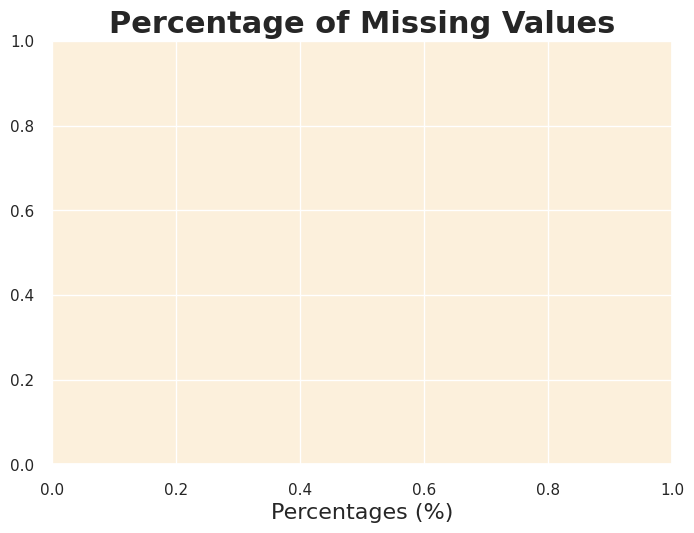

In [16]:
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

Extracting rows with missing values in 'CustomerID' or 'Description' columns

In [17]:
df[df['CustomerID'].isnull() | df['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Removing rows with missing values in 'CustomerID' and 'Description' columns

In [18]:
df = df.dropna(subset=['CustomerID', 'Description'])

Verifying the removal of missing values

In [19]:
df.isnull().sum().sum()

0

Finding duplicate rows (keeping all instances)

In [20]:
duplicate_rows = df[df.duplicated(keep=False)]

Sorting the data by certain columns to see the duplicate rows next to each other

In [21]:
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

Displaying the first 10 records

In [22]:
duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Displaying the number of duplicate rows

In [23]:
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

The dataset contains 0 duplicate rows that need to be removed.


Removing duplicate rows

In [24]:
df.drop_duplicates(inplace=True)

Getting the number of rows in the dataframe

In [25]:
df.shape[0]

501

Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status

In [26]:
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

Analyze the characteristics of these rows (considering the new column)

In [27]:
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

,Quantity,UnitPrice
count,9.000000,9.000000
mean,-14.888889,4.602222
std,9.636447,8.714720
min,-24.000000,0.290000
25%,-24.000000,0.290000
50%,-12.000000,1.650000
75%,-12.000000,3.450000
max,-1.000000,27.500000


Finding the percentage of cancelled transactions

In [28]:
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

Printing the percentage of cancelled transactions

In [29]:
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 1.80%


Finding the number of unique stock codes<br>
The above code is performing the following tasks:

In [30]:
unique_stock_codes = df['StockCode'].nunique()

Printing the number of unique stock codes

In [31]:
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 342


Finding the top 10 most frequent stock codes<br>
The above code is calculating the frequency of each unique value in the 'StockCode' column of a DataFrame called 'df'. It then selects the top 10 most frequent stock codes and calculates their percentage representation out of the total count of all stock codes.

In [32]:
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

Plotting the top 10 most frequent stock codes<br>
The above code is creating a horizontal bar plot using the matplotlib library in Python. It is plotting the data from the variable "top_10_stock_codes" as a bar chart with a specified color.

<Axes: >

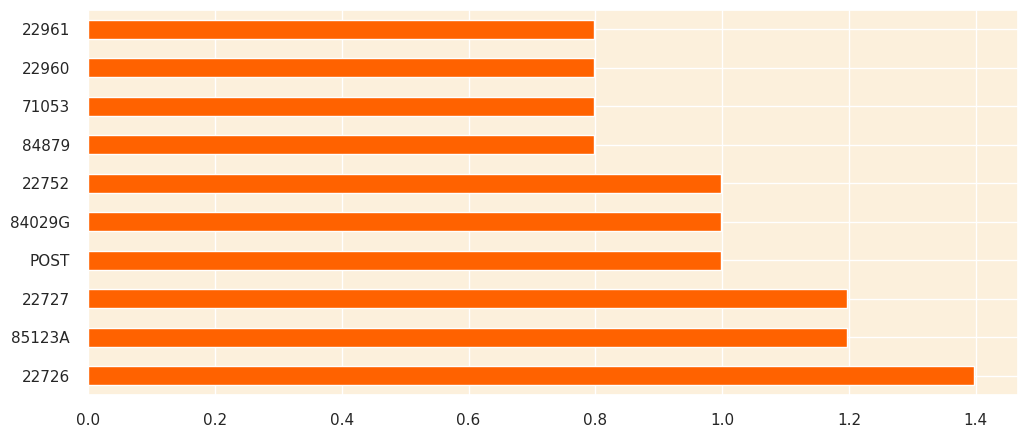

In [33]:
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#ff6200')

Adding the percentage frequency on the bars

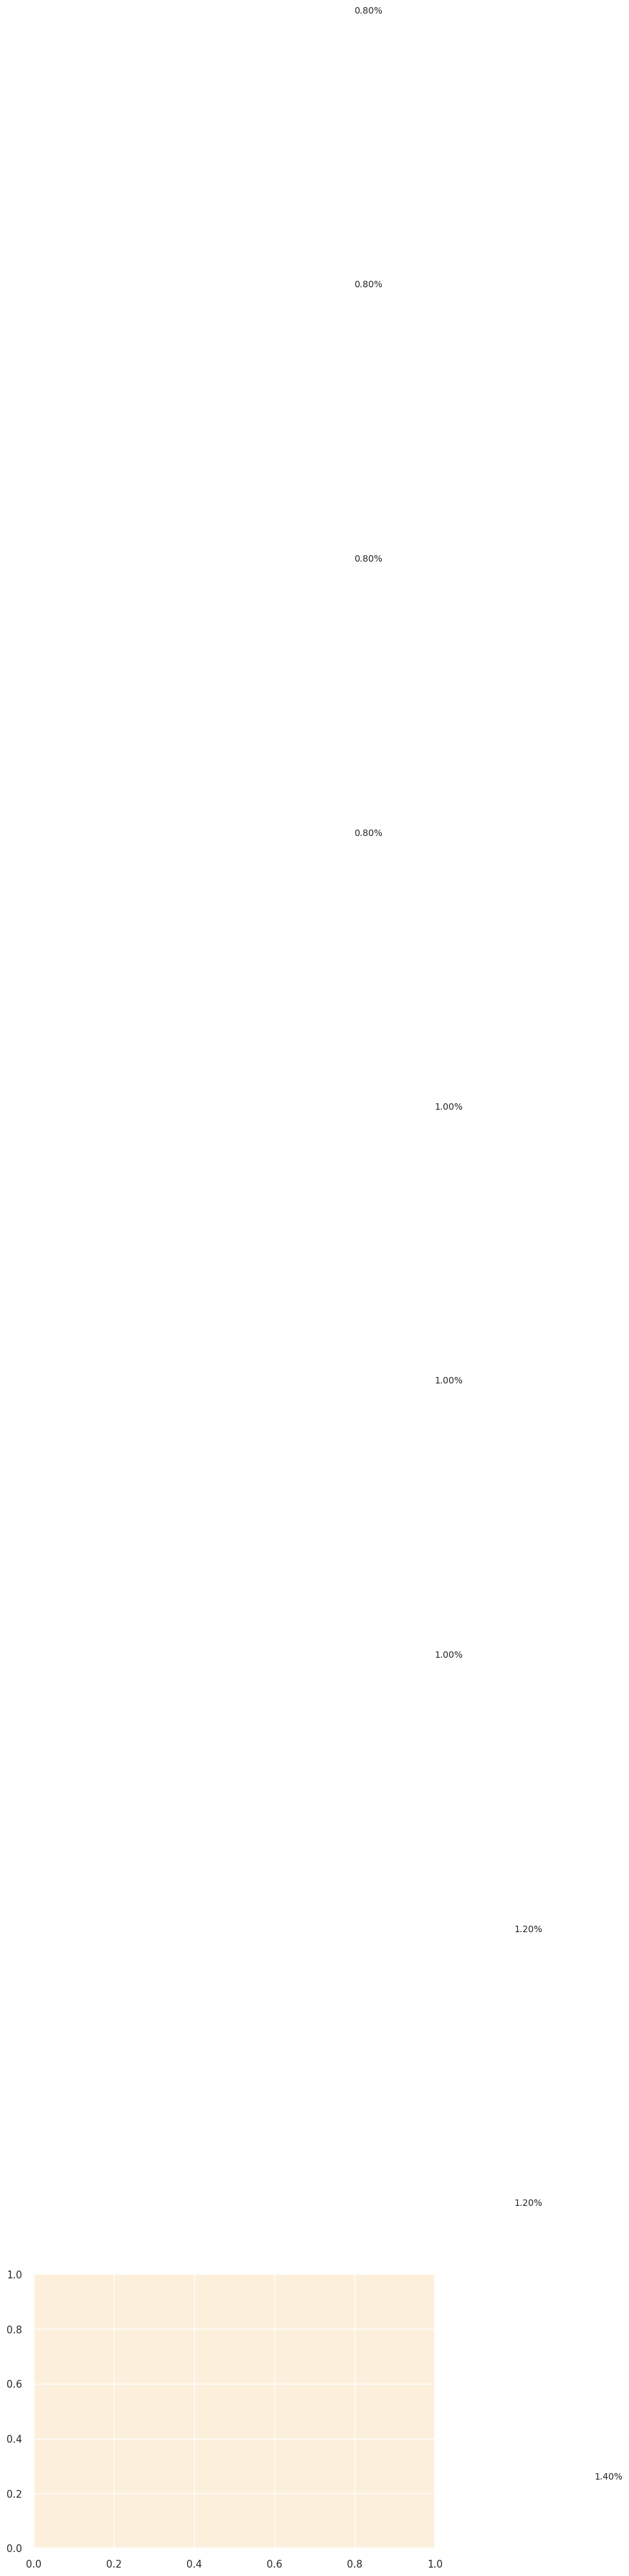

In [34]:
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

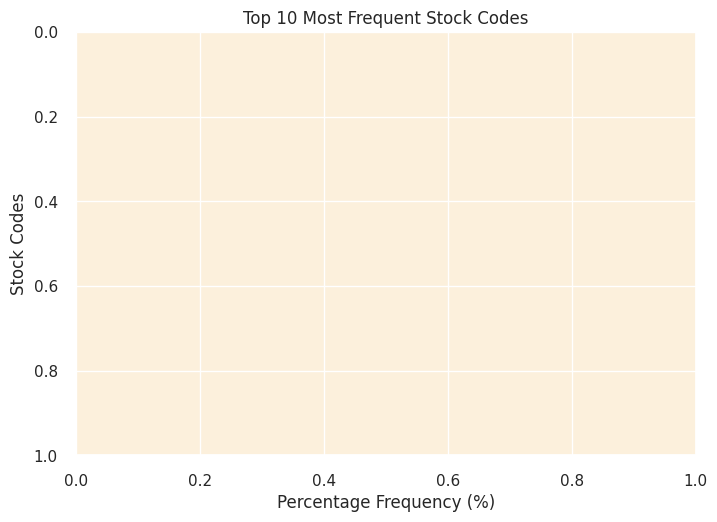

In [35]:
plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

Finding the number of numeric characters in each unique stock code

In [36]:
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

Printing the value counts for unique stock codes

In [37]:
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    339
0      2
1      1
dtype: int64


Finding and printing the stock codes with 0 and 1 numeric characters

In [38]:
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

Printing each stock code on a new line

In [39]:
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2


Calculating the percentage of records with these stock codes

In [40]:
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

Printing the percentage

In [41]:
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 1.40%


Removing rows with anomalous stock codes from the dataset

In [42]:
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

Getting the number of rows in the dataframe

In [43]:
df.shape[0]

494

Calculate the occurrence of each unique description and sort them

In [44]:
description_counts = df['Description'].value_counts()

Get the top 30 descriptions

In [45]:
top_30_descriptions = description_counts[:30]

Plotting

<BarContainer object of 10 artists>

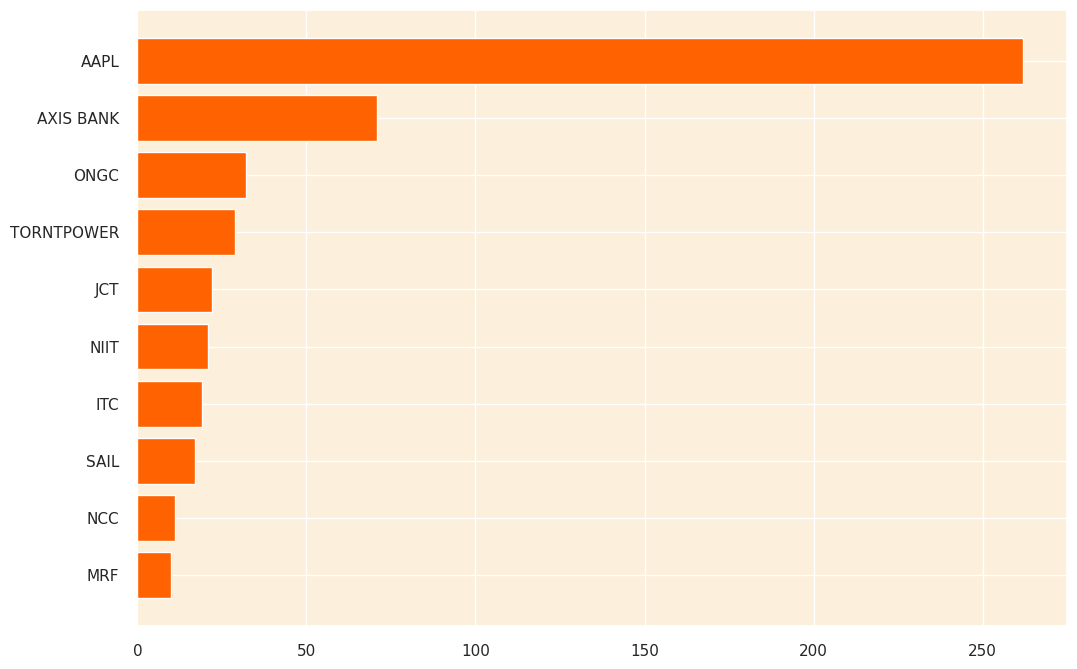

In [46]:
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ff6200')

Adding labels and title

Text(0.5, 1.0, 'Top 30 Most Frequent Descriptions')

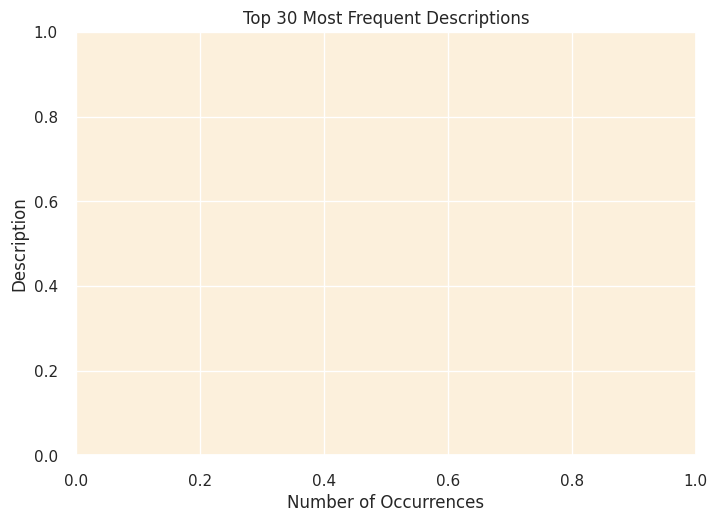

In [47]:
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

Show the plot

In [48]:
plt.show()

Find unique descriptions containing lowercase characters

In [49]:
lowercase_descriptions = df['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

Print the unique descriptions containing lowercase characters

In [50]:
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
------------------------------------------------------------


In [51]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

Calculate the percentage of records with service-related descriptions

In [52]:
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

Print the percentage of records with service-related descriptions

In [53]:
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

The percentage of records with service-related descriptions in the dataset is: 0.00%


Remove rows with service-related information in the description

In [54]:
df = df[~df['Description'].isin(service_related_descriptions)]

Standardize the text to uppercase to maintain uniformity across the dataset

In [55]:
df['Description'] = df['Description'].str.upper()

Getting the number of rows in the dataframe

In [56]:
df.shape[0]

494

In [57]:
df['UnitPrice'].describe()

count    494.000000
mean       3.513016
std        7.939451
min        0.100000
25%        1.250000
50%        2.100000
75%        4.100000
max      165.000000
Name: UnitPrice, dtype: float64

In [58]:
df[df['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


Removing records with a unit price of zero to avoid potential data entry errors

In [59]:
df = df[df['UnitPrice'] > 0]

Resetting the index of the cleaned dataset

In [60]:
df.reset_index(drop=True, inplace=True)

Getting the number of rows in the dataframe

In [61]:
df.shape[0]

494

Convert InvoiceDate to datetime type

In [62]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Convert InvoiceDate to datetime and extract only the date

In [63]:
df['InvoiceDay'] = df['InvoiceDate'].dt.date

Find the most recent purchase date for each customer

In [64]:
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

Find the most recent date in the entire dataset

In [65]:
most_recent_date = df['InvoiceDay'].max()

Convert InvoiceDay to datetime type before subtraction

In [66]:
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

Calculate the number of days since the last purchase for each customer

In [67]:
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

Remove the InvoiceDay column

In [68]:
customer_data.drop(columns=['InvoiceDay'], inplace=True)

In [69]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,12429,365
1,12431,373
2,12526,0
3,12583,373
4,12680,0


Calculate the total number of transactions made by each customer

In [70]:
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

Calculate the total number of stocks purchased by each customer

In [71]:
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

Merge the new features into the customer_data dataframe

In [72]:
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')

Display the first few rows of the customer_data dataframe

In [73]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12429,365,1,446
1,12431,373,1,107
2,12526,0,1,86
3,12583,373,1,446
4,12680,0,1,105


Calculate the total spend by each customer

In [74]:
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

Calculate the average transaction value for each customer

In [75]:
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

Merge the new features into the customer_data dataframe

In [76]:
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

Display the first few rows of the customer_data dataframe

In [77]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12429,365,1,446,1137.50,1137.50
1,12431,373,1,107,358.25,358.25
2,12526,0,1,86,241.08,241.08
3,12583,373,1,446,801.86,801.86
4,12680,0,1,105,249.45,249.45


Calculate the number of unique stocks purchased by each customer

In [78]:
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

Merge the new feature into the customer_data dataframe

In [79]:
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

Display the first few rows of the customer_data dataframe

In [80]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,12429,365,1,446,1137.50,1137.50,19
1,12431,373,1,107,358.25,358.25,14
2,12526,0,1,86,241.08,241.08,12
3,12583,373,1,446,801.86,801.86,19
4,12680,0,1,105,249.45,249.45,15


Extract day of week and hour from InvoiceDate

In [81]:
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

Calculate the average number of days between consecutive purchases

In [82]:
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

Find the favorite shopping day of the week

In [83]:
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

Find the favorite shopping hour of the day

In [84]:
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

Merge the new features into the customer_data dataframe

In [85]:
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

Display the first few rows of the customer_data dataframe

In [86]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12429,365,1,446,1137.50,1137.50,19,0.0,3,12
1,12431,373,1,107,358.25,358.25,14,0.0,2,10
2,12526,0,1,86,241.08,241.08,12,0.0,4,12
3,12583,373,1,446,801.86,801.86,19,0.0,2,8
4,12680,0,1,105,249.45,249.45,15,0.0,4,12


In [87]:
df['Country'].value_counts(normalize=True).head()

United Kingdom     0.712551
Germany            0.119433
France             0.068826
Denmark            0.038462
Channel Islands    0.032389
Name: Country, dtype: float64

Group by CustomerID and Country to get the number of transactions per country for each customer

In [88]:
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)

In [89]:
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

Create a binary column indicating whether the customer is from the UK or not

In [90]:
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

Merge this data with our customer_data dataframe

In [91]:
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

Display the first few rows of the customer_data dataframe

In [92]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12429,365,1,446,1137.50,1137.50,19,0.0,3,12,0
1,12431,373,1,107,358.25,358.25,14,0.0,2,10,0
2,12526,0,1,86,241.08,241.08,12,0.0,4,12,0
3,12583,373,1,446,801.86,801.86,19,0.0,2,8,0
4,12680,0,1,105,249.45,249.45,15,0.0,4,12,0


Display feature distribution

In [93]:
customer_data['Is_UK'].value_counts()

1    21
0     8
Name: Is_UK, dtype: int64

Calculate the total number of transactions made by each customer

In [94]:
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

Calculate the number of cancelled transactions for each customer

In [95]:
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

Merge the Cancellation Frequency data into the customer_data dataframe

In [96]:
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

Replace NaN values with 0 (for customers who have not cancelled any transaction)

In [97]:
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

Calculate the Cancellation Rate

In [98]:
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

Display the first few rows of the customer_data dataframe

In [99]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate
0,12429,365,1,446,1137.50,1137.50,19,0.0,3,12,0,0.0,0.0
1,12431,373,1,107,358.25,358.25,14,0.0,2,10,0,0.0,0.0
2,12526,0,1,86,241.08,241.08,12,0.0,4,12,0,0.0,0.0
3,12583,373,1,446,801.86,801.86,19,0.0,2,8,0,0.0,0.0
4,12680,0,1,105,249.45,249.45,15,0.0,4,12,0,0.0,0.0


Extract month and year from InvoiceDate

In [100]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

Calculate monthly spending for each customer

In [101]:
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns

In [102]:
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month

In [103]:
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

Calculate Trends in Spending<br>
We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends

In [104]:
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

Apply the calculate_trend function to find the spending trend for each customer

In [105]:
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

Merge the new features into the customer_data dataframe

In [106]:
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

Display the first few rows of the customer_data dataframe

In [107]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12429,365,1,446,1137.50,1137.50,19,0.0,3,12,0,0.0,0.0,1137.50,0.0,0
1,12431,373,1,107,358.25,358.25,14,0.0,2,10,0,0.0,0.0,358.25,0.0,0
2,12526,0,1,86,241.08,241.08,12,0.0,4,12,0,0.0,0.0,241.08,0.0,0
3,12583,373,1,446,801.86,801.86,19,0.0,2,8,0,0.0,0.0,801.86,0.0,0
4,12680,0,1,105,249.45,249.45,15,0.0,4,12,0,0.0,0.0,249.45,0.0,0


Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations

In [108]:
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

Convert data types of columns to optimal types

In [109]:
customer_data = customer_data.convert_dtypes()

In [110]:
customer_data.head(10)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12429,365,1,446,1137.5,1137.5,19,0,3,12,0,0,0,1137.5,0,0
1,12431,373,1,107,358.25,358.25,14,0,2,10,0,0,0,358.25,0,0
2,12526,0,1,86,241.08,241.08,12,0,4,12,0,0,0,241.08,0,0
3,12583,373,1,446,801.86,801.86,19,0,2,8,0,0,0,801.86,0,0
4,12680,0,1,105,249.45,249.45,15,0,4,12,0,0,0,249.45,0,0
5,12713,0,1,505,794.55,794.55,37,0,4,12,0,0,0,794.55,0,0
6,12738,372,1,147,137.35,137.35,10,0,3,18,0,0,0,137.35,0,0
7,12748,0,1,82,94.11,94.11,24,0,4,12,1,0,0,94.11,0,0
8,13047,373,3,101,366.63,122.21,17,0,2,8,1,0,0,366.63,0,0
9,13113,0,1,66,339.2,339.2,4,0,4,12,1,0,0,339.2,0,0


In [111]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      29 non-null     string 
 1   Days_Since_Last_Purchase        29 non-null     Int64  
 2   Total_Transactions              29 non-null     Int64  
 3   Total_Products_Purchased        29 non-null     Int64  
 4   Total_Spend                     29 non-null     Float64
 5   Average_Transaction_Value       29 non-null     Float64
 6   Unique_Products_Purchased       29 non-null     Int64  
 7   Average_Days_Between_Purchases  29 non-null     Int64  
 8   Day_Of_Week                     29 non-null     Int64  
 9   Hour                            29 non-null     Int64  
 10  Is_UK                           29 non-null     Int64  
 11  Cancellation_Frequency          29 non-null     Int64  
 12  Cancellation_Rate               29 non

Initializing the IsolationForest model with a contamination parameter of 0.05

In [112]:
model = IsolationForest(contamination=0.05, random_state=0)

Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)

In [113]:
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

Creating a new column to identify outliers (1 for inliers and -1 for outliers)

In [114]:
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

Display the first few rows of the customer_data dataframe

In [115]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,12429,365,1,446,1137.5,1137.5,19,0,3,12,0,0,0,1137.5,0,0,1,0
1,12431,373,1,107,358.25,358.25,14,0,2,10,0,0,0,358.25,0,0,1,0
2,12526,0,1,86,241.08,241.08,12,0,4,12,0,0,0,241.08,0,0,1,0
3,12583,373,1,446,801.86,801.86,19,0,2,8,0,0,0,801.86,0,0,1,0
4,12680,0,1,105,249.45,249.45,15,0,4,12,0,0,0,249.45,0,0,1,0


Calculate the percentage of inliers and outliers

In [116]:
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

Plotting the percentage of inliers and outliers

<Axes: >

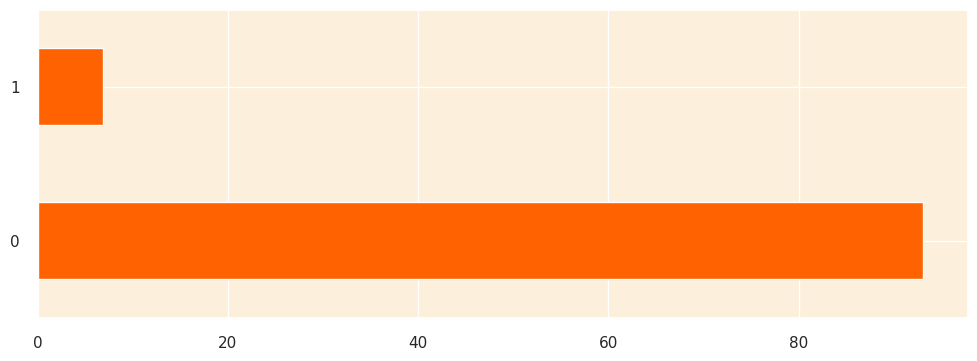

In [117]:
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

Adding the percentage labels on the bars

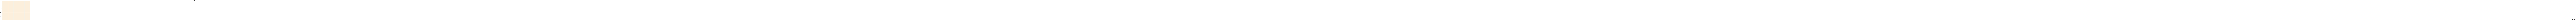

In [118]:
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

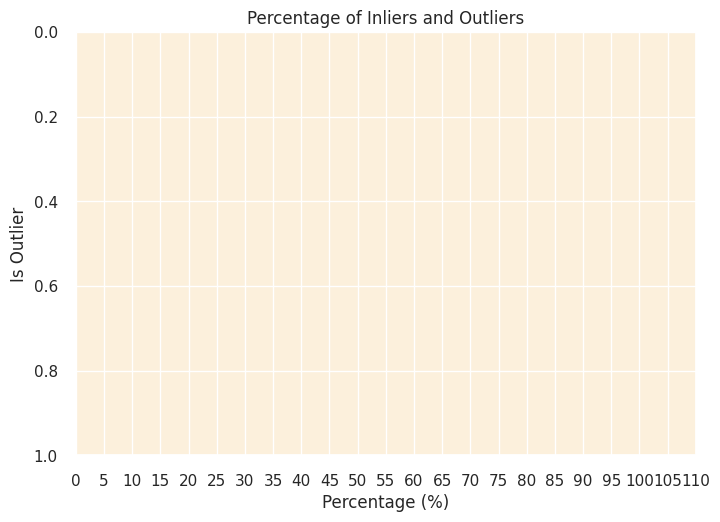

In [119]:
plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

Separate the outliers for analysis

In [120]:
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

Remove the outliers from the main dataset

In [121]:
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

Drop the 'Outlier_Scores' and 'Is_Outlier' columns

In [122]:
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

Reset the index of the cleaned data

In [123]:
customer_data_cleaned.reset_index(drop=True, inplace=True)

Getting the number of rows in the cleaned customer dataset

In [124]:
customer_data_cleaned.shape[0]

27

Reset background style

In [125]:
sns.set_style('whitegrid')

Calculate the correlation matrix excluding the 'CustomerID' column

In [126]:
corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

Define a custom colormap

In [127]:
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

Create a mask to only show the lower triangle of the matrix (since it's mirrored around its<br>
top-left to bottom-right diagonal)

In [128]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

Plot the heatmap

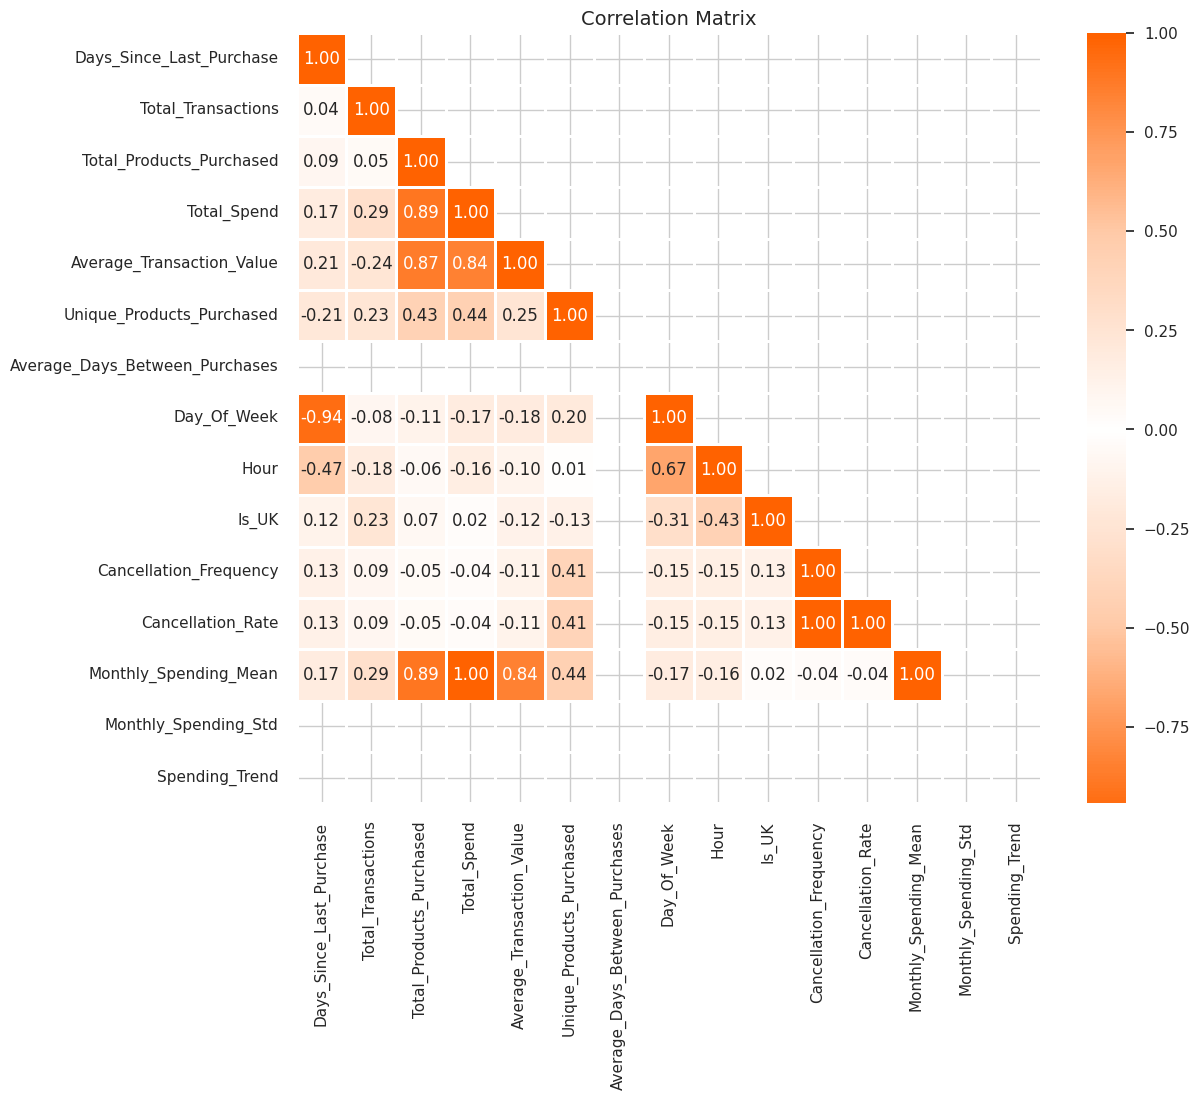

In [129]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

Initialize the StandardScaler

In [130]:
scaler = StandardScaler()

List of columns that don't need to be scaled

In [131]:
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

List of columns that need to be scaled

In [132]:
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

Copy the cleaned dataset

In [133]:
customer_data_scaled = customer_data_cleaned.copy()

Applying the scaler to the necessary columns in the dataset

In [134]:
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

Display the first few rows of the scaled data

In [135]:
customer_data_scaled.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12429,0.607024,-0.362143,0.585873,1.582305,1.852651,0.337325,0.0,3,0.720003,0,-0.196116,-0.196116,1.582305,0.0,0.0
1,12431,0.654104,-0.362143,-0.544263,-0.405653,-0.204626,-0.204804,0.0,2,-0.276924,0,-0.196116,-0.196116,-0.405653,0.0,0.0
2,12526,-1.540991,-0.362143,-0.614271,-0.704568,-0.513964,-0.421656,0.0,4,0.720003,0,-0.196116,-0.196116,-0.704568,0.0,0.0
3,12583,0.654104,-0.362143,0.585873,0.726048,0.966537,0.337325,0.0,2,-1.273852,0,-0.196116,-0.196116,0.726048,0.0,0.0
4,12680,-1.540991,-0.362143,-0.550930,-0.683215,-0.491867,-0.096379,0.0,4,0.720003,0,-0.196116,-0.196116,-0.683215,0.0,0.0


Setting CustomerID as the index column

In [136]:
customer_data_scaled.set_index('CustomerID', inplace=True)

Apply PCA

In [137]:
pca = PCA().fit(customer_data_scaled)

Calculate the Cumulative Sum of the Explained Variance

In [138]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

Set the optimal k value (based on our analysis, we can choose 6)

In [139]:
optimal_k = 6

Set seaborn plot style

In [140]:
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

Plot the cumulative explained variance against the number of components

In [141]:
plt.figure(figsize=(20, 10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

Bar chart for the explained variance of each component

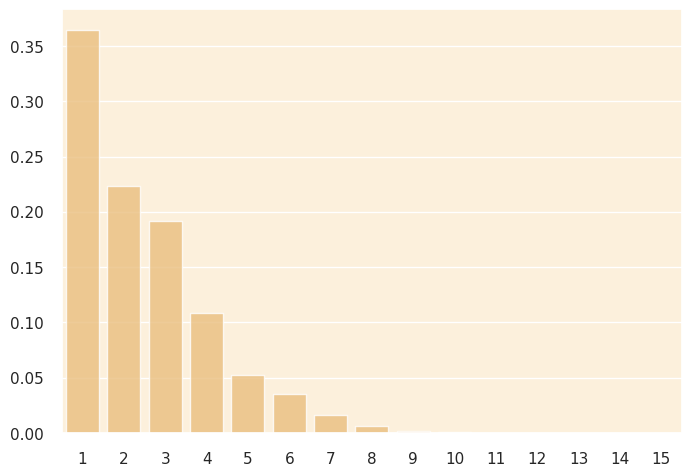

In [142]:
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

Line plot for the cumulative explained variance

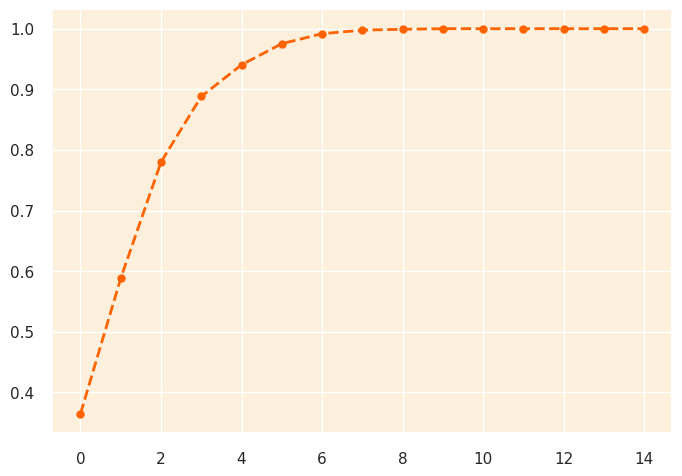

In [143]:
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

Plot optimal k value line

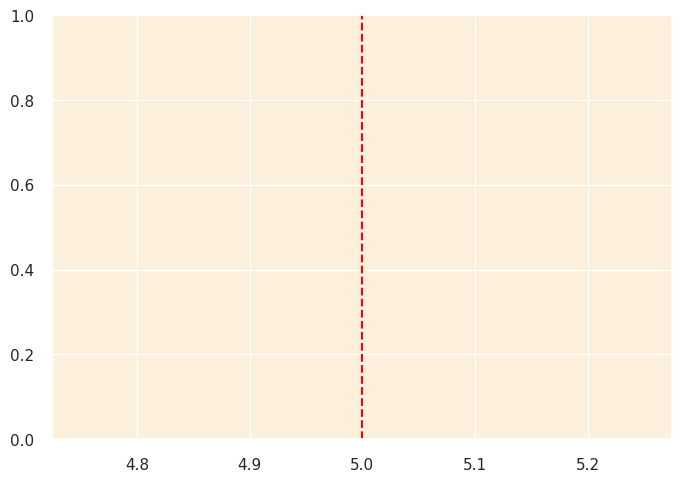

In [144]:
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}')

Set labels and title

Text(0.5, 1.0, 'Cumulative Variance vs. Number of Components')

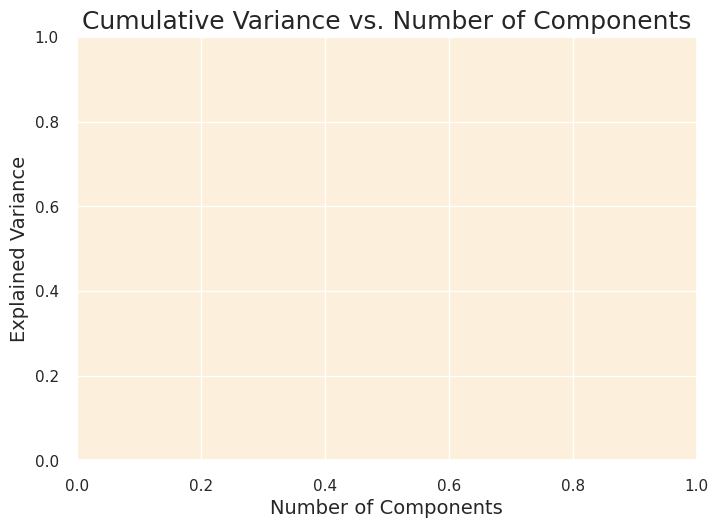

In [145]:
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

Customize ticks and legend

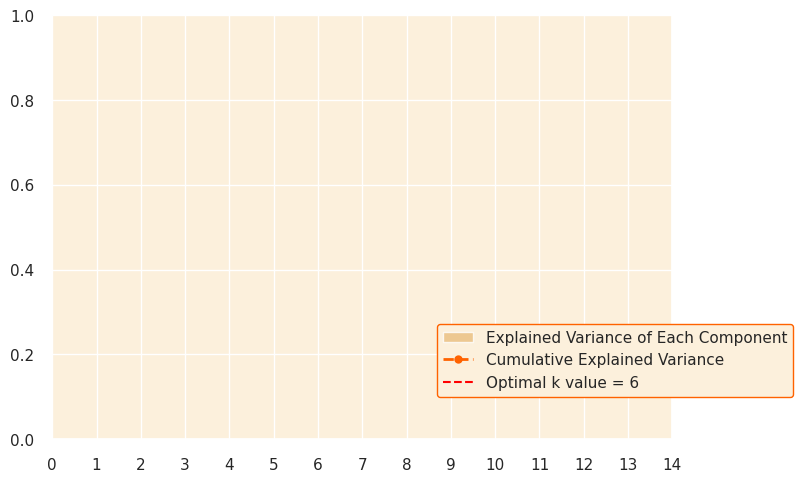

In [146]:
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,
           edgecolor='#ff6200')

Display the variance values for both graphs on the plots

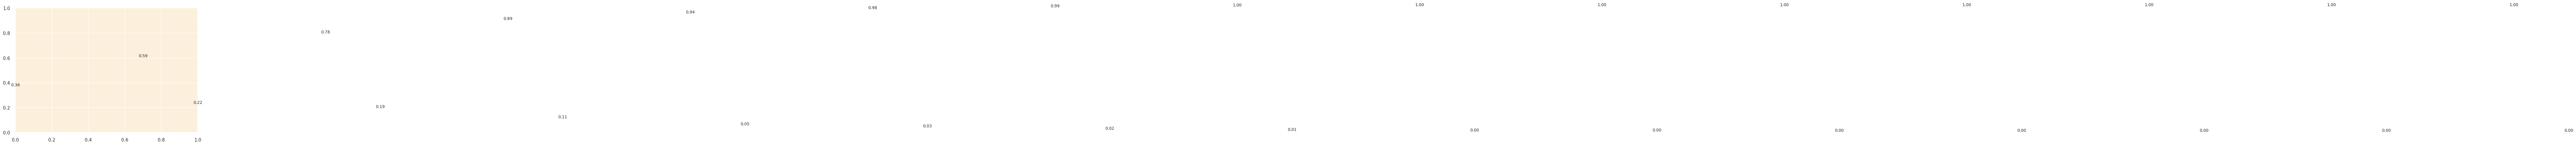

In [147]:
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

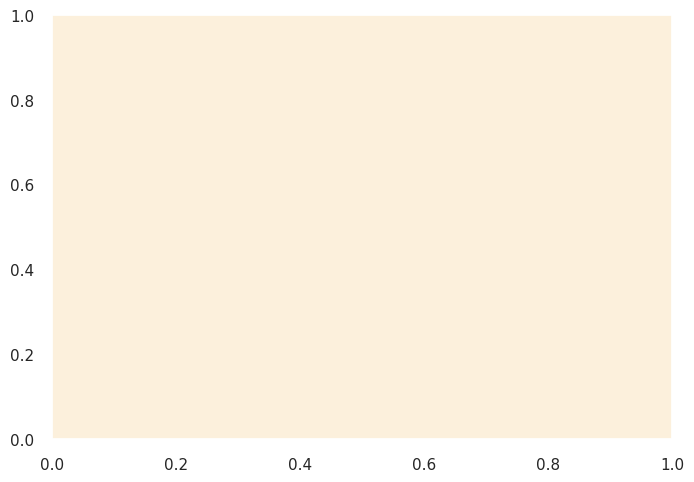

In [148]:
plt.grid(axis='both')
plt.show()

Creating a PCA object with 6 components

In [149]:
pca = PCA(n_components=6)

Fitting and transforming the original data to the new PCA dataframe

In [150]:
customer_data_pca = pca.fit_transform(customer_data_scaled)

Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.

In [151]:
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

Adding the CustomerID index back to the new PCA dataframe

In [152]:
customer_data_pca.index = customer_data_scaled.index

Displaying the resulting dataframe based on the PCs

In [153]:
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12429,2.584487,-1.083262,0.069040,-0.832390,0.851875,-0.203299
12431,-0.609422,0.441509,-0.949528,-0.316256,0.107335,-0.706404
12526,-1.850941,-1.346574,1.075014,-0.167835,-0.235073,0.348592
12583,1.782318,0.309158,-0.959704,-0.390296,-0.683334,-0.518079
12680,-1.713739,-1.336362,1.233421,-0.151114,-0.314206,0.117352


Define a function to highlight the top 3 absolute values in each column of a dataframe

In [154]:
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

Create the PCA component DataFrame and apply the highlighting function

In [155]:
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],
                     index=customer_data_scaled.columns)

In [156]:
pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6
Days_Since_Last_Purchase,0.146275,0.360470,-0.450334,-0.102673,0.421510,-0.345528
Total_Transactions,0.101393,0.138642,0.096988,0.841001,0.267929,0.099970
Total_Products_Purchased,0.459861,-0.141276,0.053518,-0.103561,-0.002142,0.127903
Total_Spend,0.485365,-0.086870,0.027979,0.104690,0.080762,0.117112
Average_Transaction_Value,0.434970,-0.155861,-0.075112,-0.350880,-0.044503,0.098933
Unique_Products_Purchased,0.238977,0.080900,0.477996,0.081662,-0.250441,-0.757903
Average_Days_Between_Purchases,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000
Day_Of_Week,-0.138608,-0.363351,0.415878,0.030130,-0.110125,0.157735
Hour,-0.134896,-0.363729,0.306094,-0.173243,0.785566,-0.073949
Is_UK,0.013529,0.091924,-0.054832,0.106586,-0.157301,0.336352


Set plot style, and background color

In [157]:
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

Set the color palette for the plot

In [158]:
sns.set_palette(['#ff6200'])

Instantiate the clustering model with the specified parameters

In [159]:
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

Create a figure and axis with the desired size

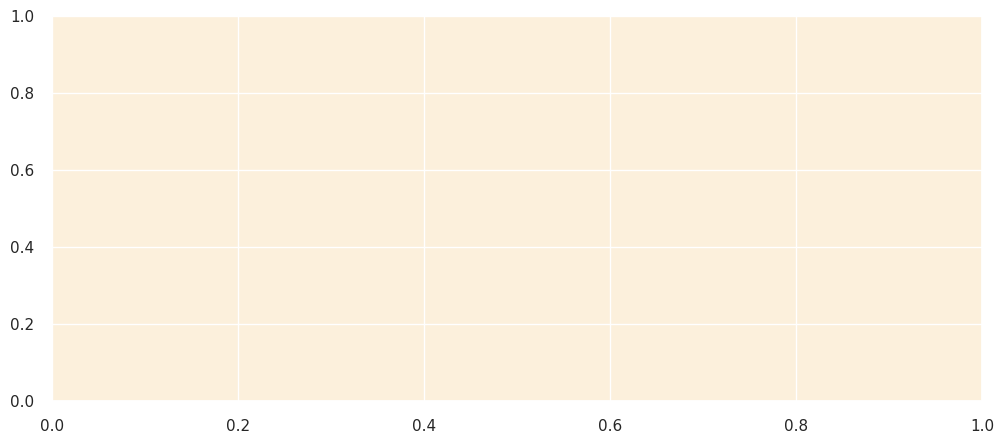

In [160]:
fig, ax = plt.subplots(figsize=(12, 5))

Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot

In [161]:
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

Fit the data to the visualizer

In [162]:
visualizer.fit(customer_data_pca)

KElbowVisualizer(ax=<Axes: >,
                 estimator=KMeans(max_iter=100, n_clusters=14, n_init=10,
                                  random_state=0),
                 k=(2, 15), timings=False)

Finalize and render the figure

In [163]:
visualizer.show();

In [166]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom',
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))


    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

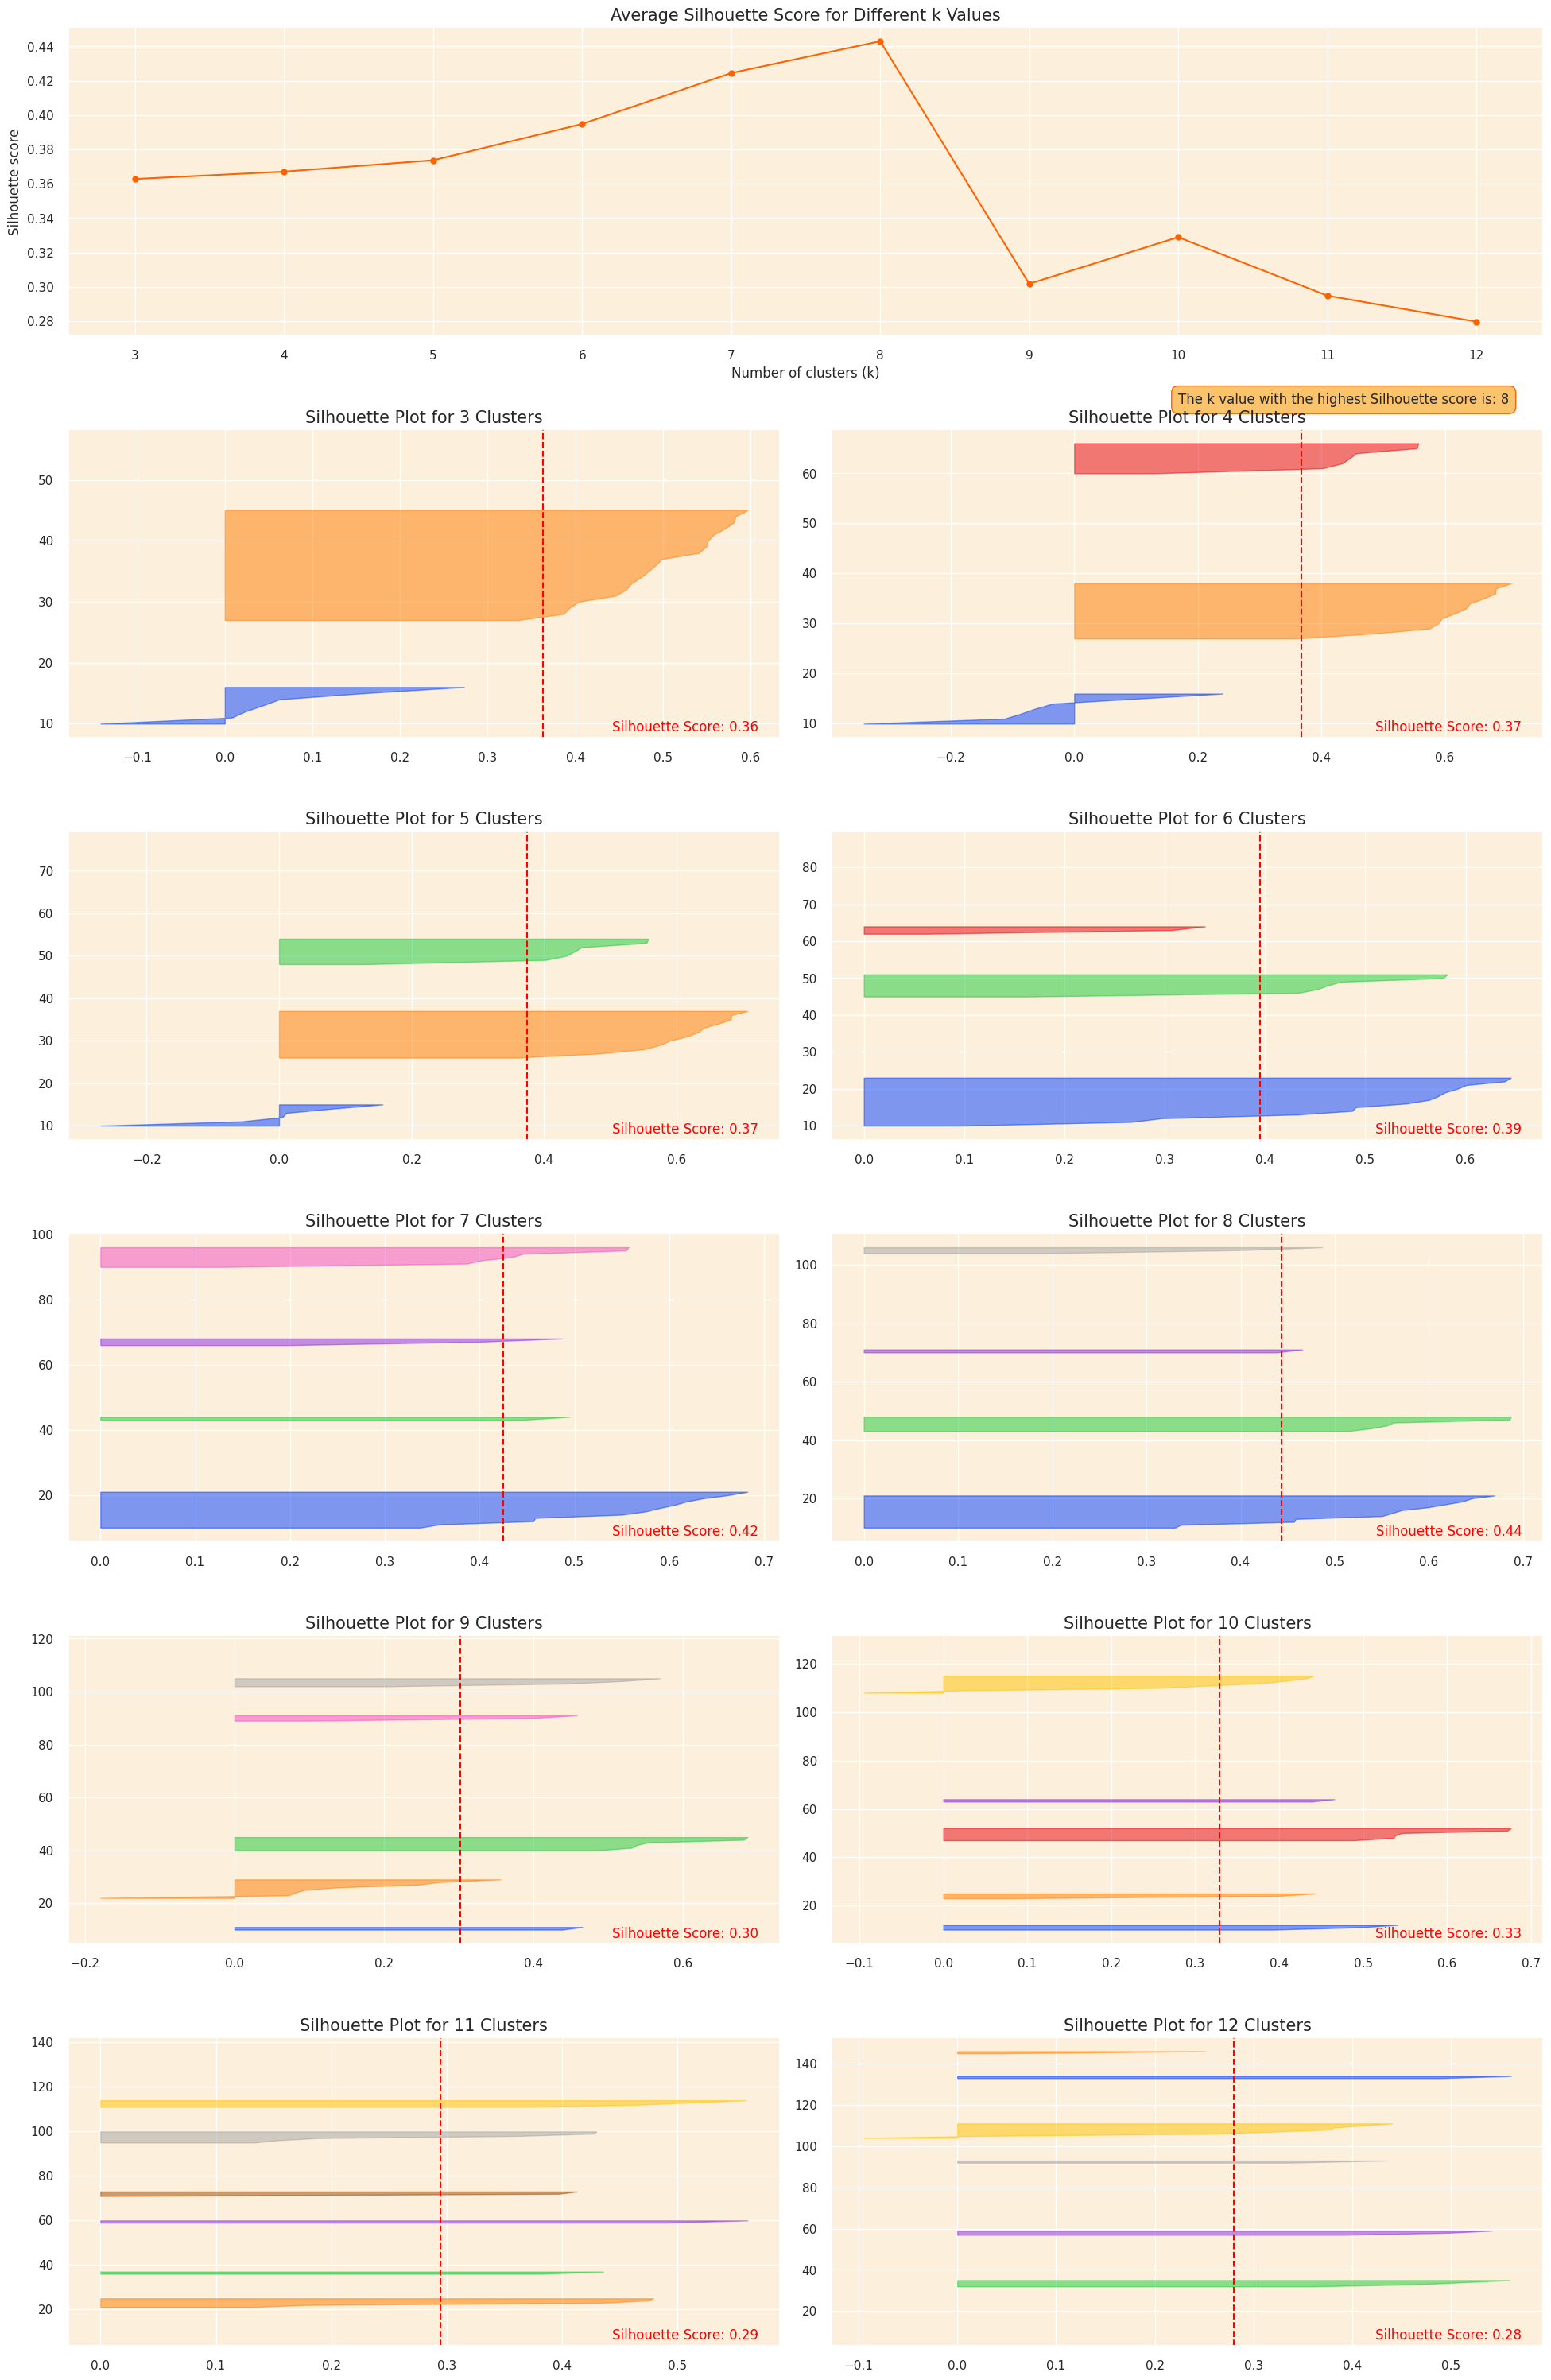

In [167]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

Apply KMeans clustering using the optimal k

In [168]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

In [169]:
customer_data_cleaned.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster
0,12429,365,1,446,1137.5,1137.5,19,0,3,12,0,0,0,1137.5,0,0,1
1,12431,373,1,107,358.25,358.25,14,0,2,10,0,0,0,358.25,0,0,2
2,12526,0,1,86,241.08,241.08,12,0,4,12,0,0,0,241.08,0,0,2
3,12583,373,1,446,801.86,801.86,19,0,2,8,0,0,0,801.86,0,0,1
4,12680,0,1,105,249.45,249.45,15,0,4,12,0,0,0,249.45,0,0,2


Setting up the color scheme for the clusters (RGB order)

In [170]:
colors = ['#e8000b', '#1ac938', '#023eff']

Create separate data frames for each cluster

In [171]:
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]

Create a 3D scatter plot

In [172]:
fig = go.Figure()

Add data points for each cluster separately and specify the color

In [173]:
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'],
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'],
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'],
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

Set the title and layout details

In [174]:
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

Show the plot

In [175]:
fig.show()

Calculate the percentage of customers in each cluster

In [176]:
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

Create a horizontal bar plot

<Axes: xlabel='Percentage', ylabel='Cluster'>

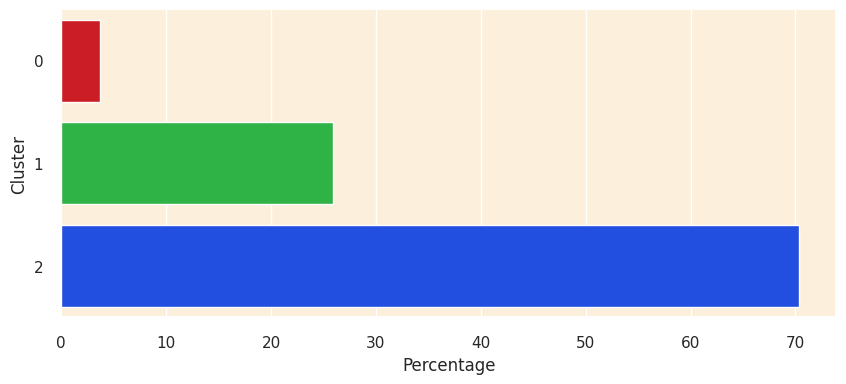

In [177]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

Adding percentages on the bars

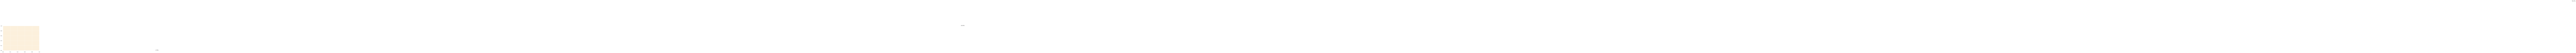

In [178]:
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

Text(0.5, 0, 'Percentage (%)')

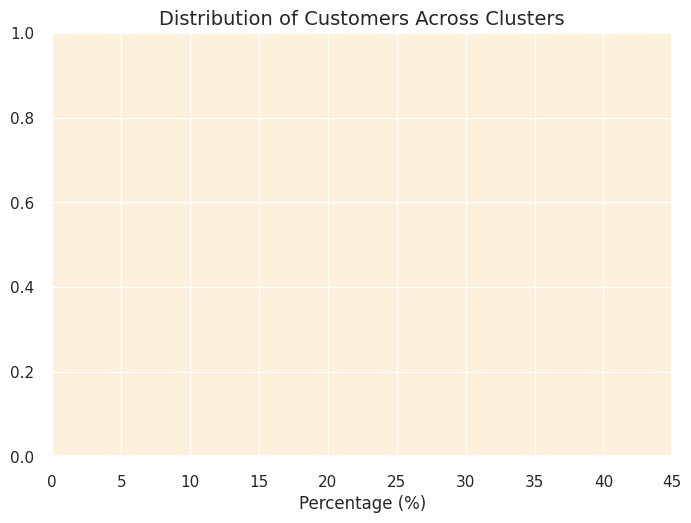

In [179]:
plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

Show the plot

In [180]:
plt.show()

Compute number of customers

In [181]:
num_observations = len(customer_data_pca)

Separate the features and the cluster labels

In [182]:
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

Compute the metrics

In [183]:
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

Create a table to display the metrics and the number of observations

In [184]:
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

Print the table

In [185]:
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Number of Observations  |         27          |
|    Silhouette Score     | 0.36279746666614926 |
| Calinski Harabasz Score |  10.98173573524637  |
|  Davies Bouldin Score   | 0.9673624801175876  |
+-------------------------+---------------------+


Setting 'CustomerID' column as index and assigning it to a new dataframe

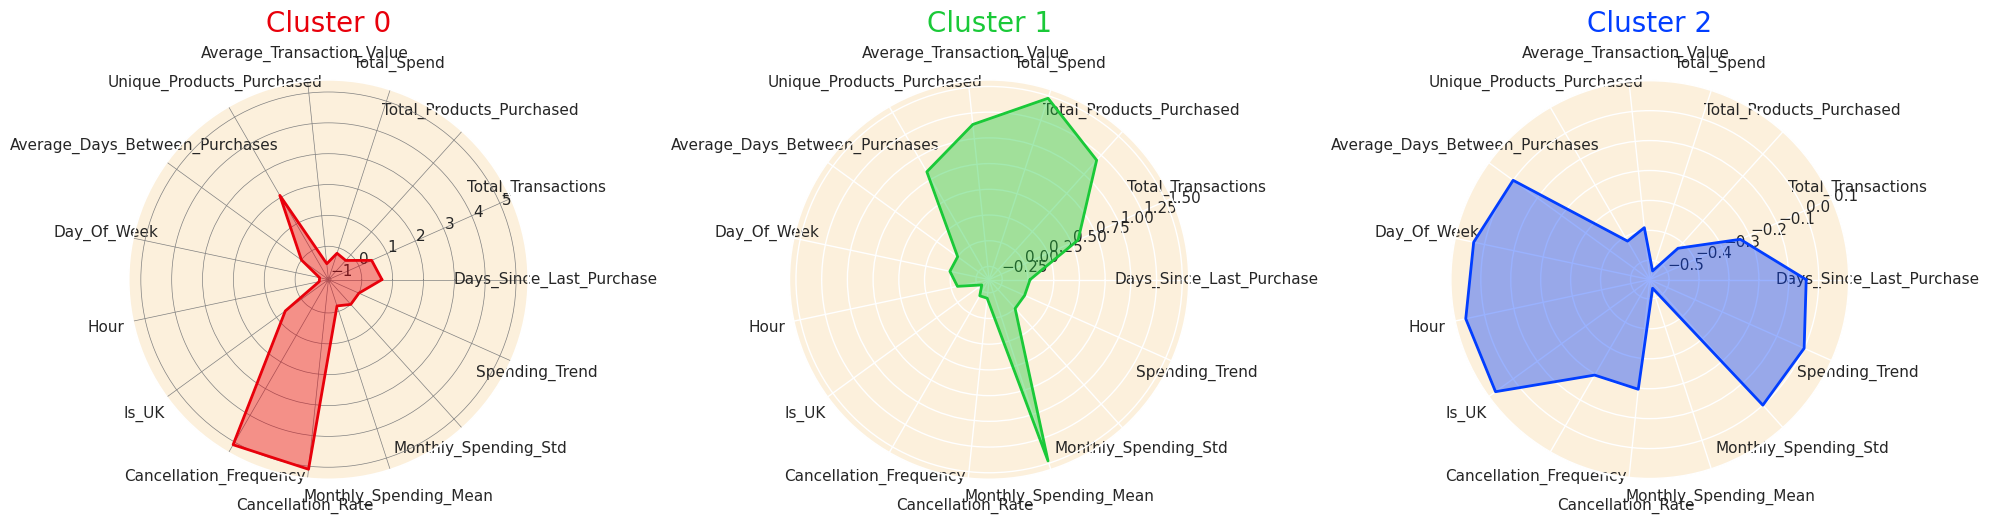

In [186]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = customer_data_cleaned.set_index('CustomerID')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

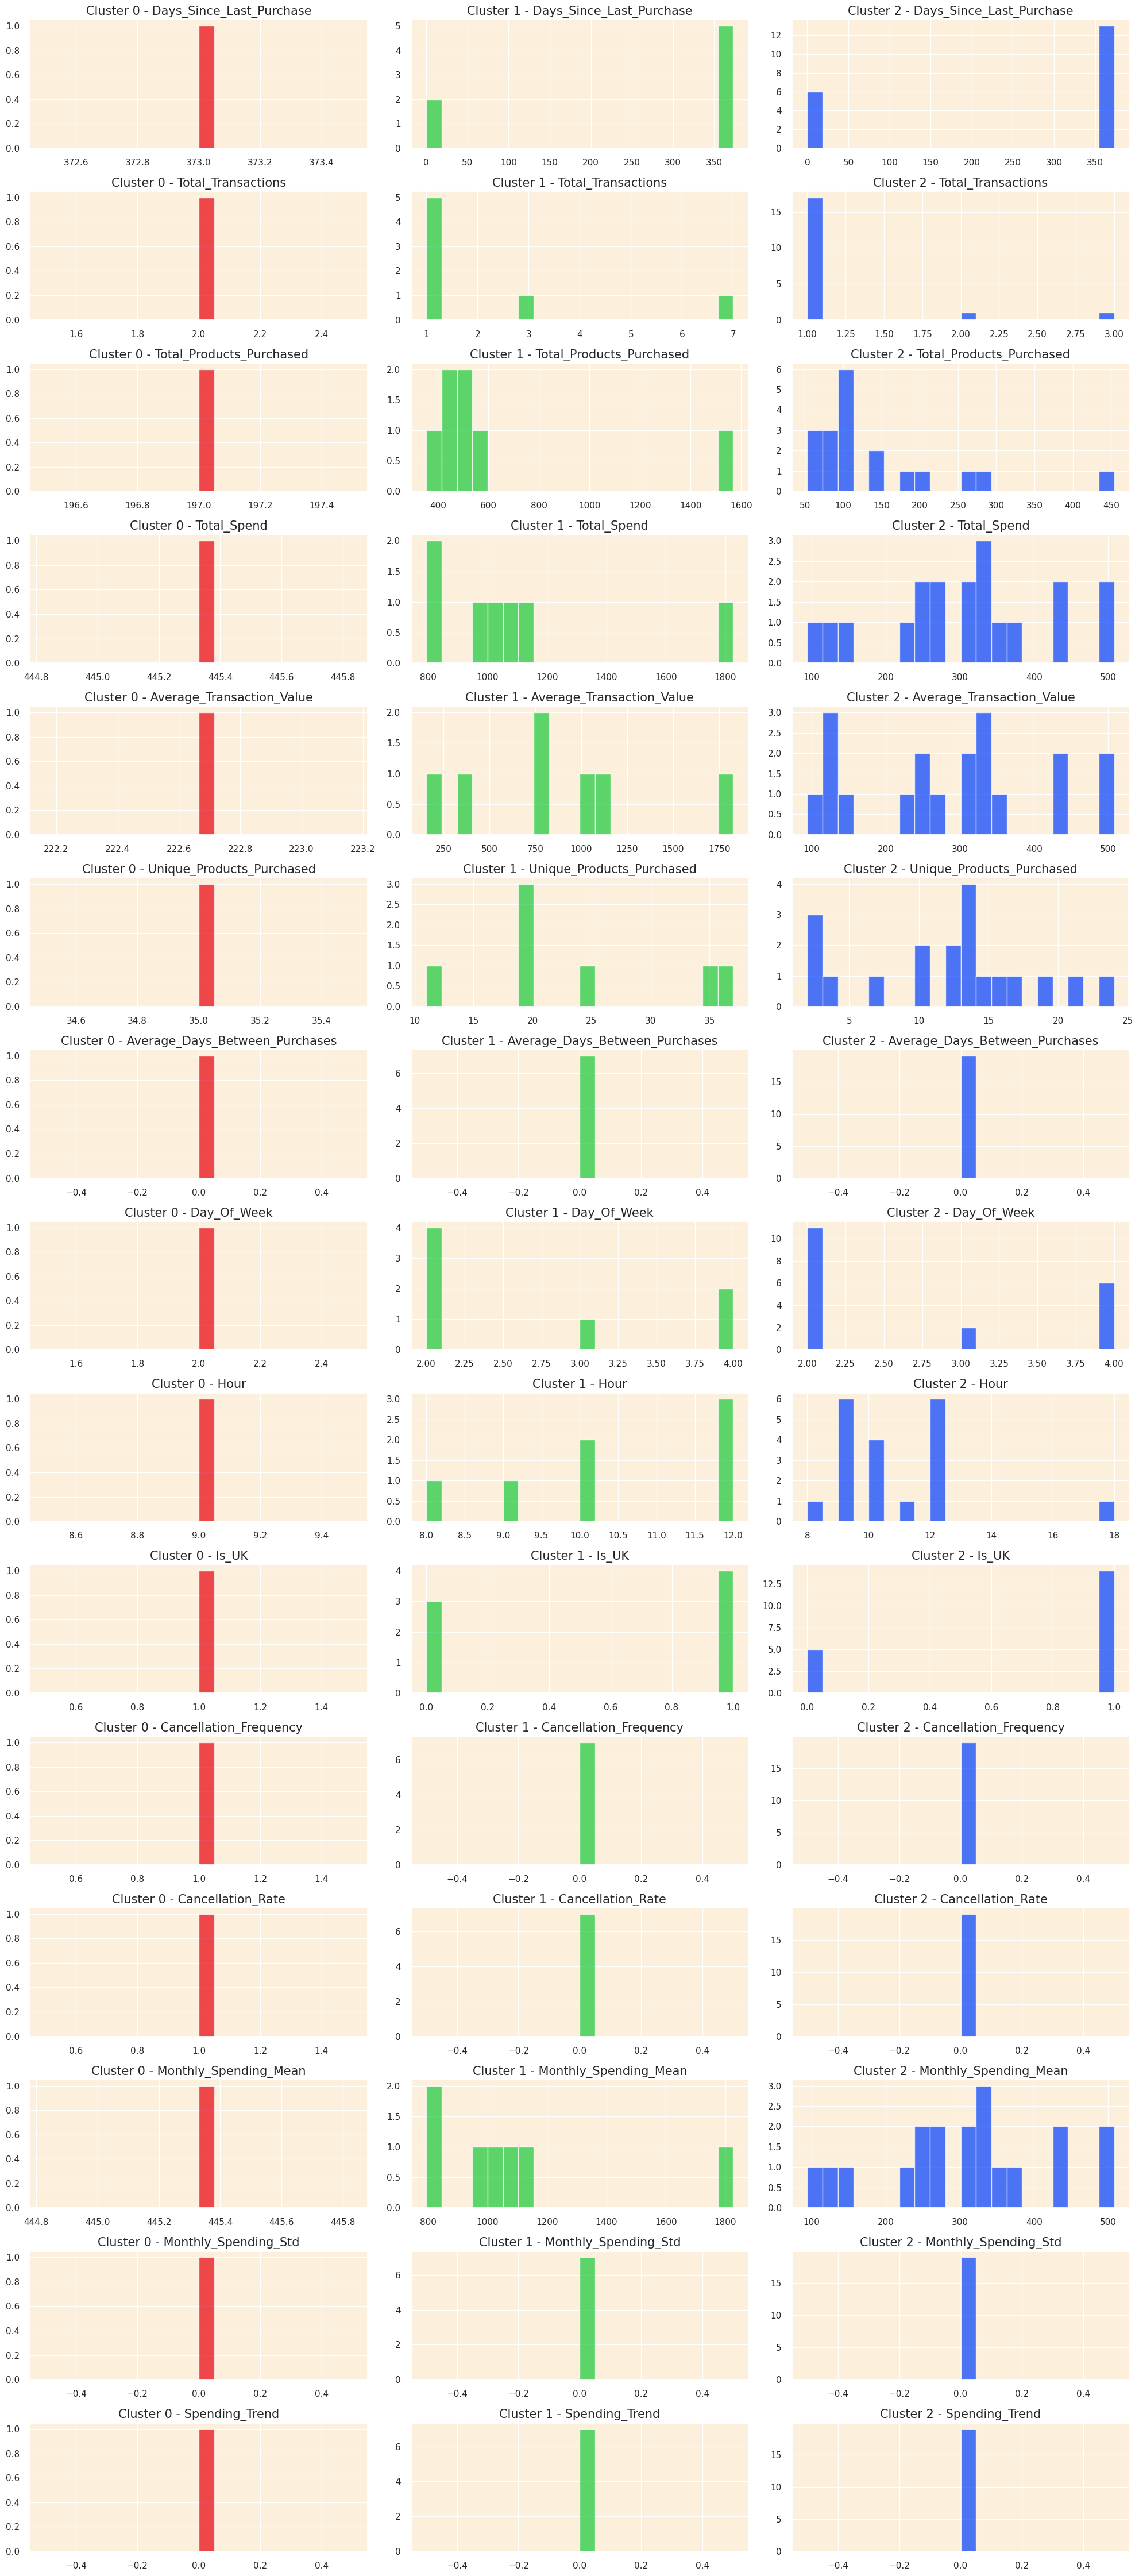

In [187]:
# Plot histograms for each feature segmented by the clusters
features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

In [188]:
def generate_recommendations(outliers_data, df, customer_data_cleaned):
    # Step 1: Extract the CustomerIDs of the outliers and remove their transactions from the main dataframe
    outlier_customer_ids = outliers_data['CustomerID'].astype('float').unique()
    df_filtered = df[~df['CustomerID'].isin(outlier_customer_ids)]

    # Step 2: Ensure consistent data type for CustomerID across both dataframes before merging
    customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')

    # Step 3: Merge the transaction data with the customer data to get the cluster information for each transaction
    merged_data = df_filtered.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')

    # Step 4: Identify the top 10 best-selling products in each cluster based on the total quantity sold
    best_selling_products = merged_data.groupby(['cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
    best_selling_products = best_selling_products.sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
    top_products_per_cluster = best_selling_products.groupby('cluster').head(10)

    # Step 5: Create a record of products purchased by each customer in each cluster
    customer_purchases = merged_data.groupby(['CustomerID', 'cluster', 'StockCode'])['Quantity'].sum().reset_index()

    # Step 6: Generate recommendations for each customer in each cluster
    recommendations = []
    for cluster in top_products_per_cluster['cluster'].unique():
        top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
        customers_in_cluster = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]['CustomerID']
        for customer in customers_in_cluster:
            # Identify products already purchased by the customer
            customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) &
                                                             (customer_purchases['cluster'] == cluster)]['StockCode'].tolist()

            # Find top 3 products in the best-selling list that the customer hasn't purchased yet
            top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
            top_3_products_not_purchased = top_products_not_purchased.head(3)

            # Append the recommendations to the list
            recommendations.append([customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist())

    # Step 7: Create a dataframe from the recommendations list and merge it with the original customer data
    recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'cluster', 'Rec1_StockCode', 'Rec1_Description',
                                                     'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
    customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['CustomerID', 'cluster'], how='right')

    # Returning both the merged data and a sampled subset of the last six columns for 10 customers
    sampled_data = customer_data_with_recommendations.set_index('CustomerID').iloc[:, -6:].sample(1, random_state=0)
    return customer_data_with_recommendations, sampled_data

Example usage<br>
Assuming your dataframes are defined as outliers_data, df, and customer_data_cleaned

In [189]:
result_with_recommendations, sampled_output = generate_recommendations(outliers_data, df, customer_data_cleaned)

Accessing the merged data

In [190]:
print(result_with_recommendations.head())

   CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     15311.0                       373                   2   
1     12429.0                       365                   1   
2     12583.0                       373                   1   
3     12713.0                         0                   1   
4     13408.0                       373                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                       197       445.33                    222.665   
1                       446       1137.5                     1137.5   
2                       446       801.86                     801.86   
3                       505       794.55                     794.55   
4                       544      1024.68                    1024.68   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                         35                               0            2   
1                         19            

Accessing the sampled subset

In [191]:
print(sampled_output)

           Rec1_StockCode Rec1_Description Rec2_StockCode Rec2_Description  \
CustomerID                                                                   
12583.0             20668             ONGC          21786        AXIS BANK   

           Rec3_StockCode Rec3_Description  
CustomerID                                  
12583.0            84970S             AAPL  


Display 10 random rows from the customer_data_with_recommendations dataframe

In [192]:
import pickle

In [193]:
pickle.dump((result_with_recommendations, sampled_output),open('file2.pkl','wb'))